<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

#### Load the health insurance dataset and check the first five observations

In [2]:
df = pd.read_csv('health_insurance.csv')

### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

In [3]:
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='bmi'>

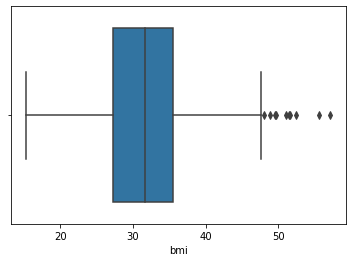

In [8]:
sns.boxplot(data = df,x='bmi')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='age', ylabel='Count'>

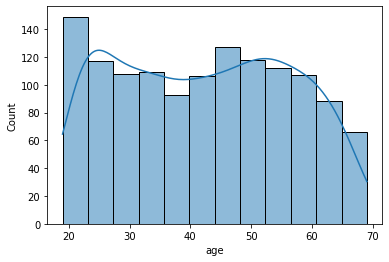

In [26]:
sns.histplot(df,x='age',kde=True)
#df['age'].distplot(kind='density')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

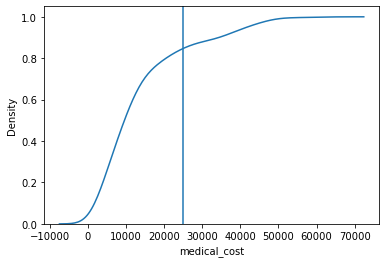

In [57]:

sns.kdeplot(df['medical_cost'],cumulative=True)
plt.axvline(25000)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

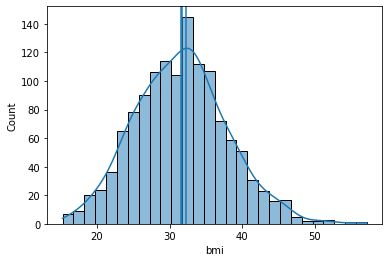

In [32]:
sns.histplot(df,x='bmi',kde=True)
plt.axvline(df['bmi'].mean(),)
plt.axvline(df['bmi'].median())
plt.axvline(df['bmi'].mode()[0])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='medical_cost'>

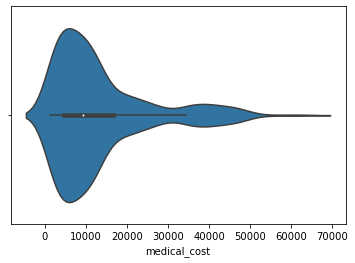

In [37]:
sns.violinplot(data = df,x = 'medical_cost')

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
df[(df['age'] <30) & (df['medical_cost']>40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='bmi', ylabel='medical_cost'>

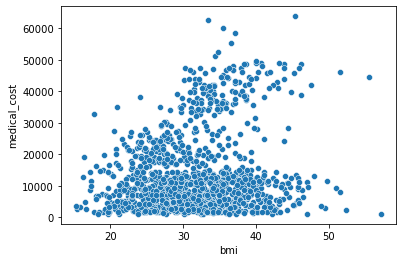

In [75]:
sns.scatterplot(data = df,x ='bmi', y ='medical_cost')
# yes

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [83]:
#df.groupby('gender')['bmi'].

(df.groupby('gender')['bmi'].std()/df.groupby('gender')['bmi'].mean())*100

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [114]:
df.groupby('region')['gender'].value_counts()

region     gender
northeast  F         174
           M         141
northwest  M         166
           F         149
southeast  F         178
           M         178
southwest  M         158
           F         156
Name: gender, dtype: int64

In [ ]:
# cross tab

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

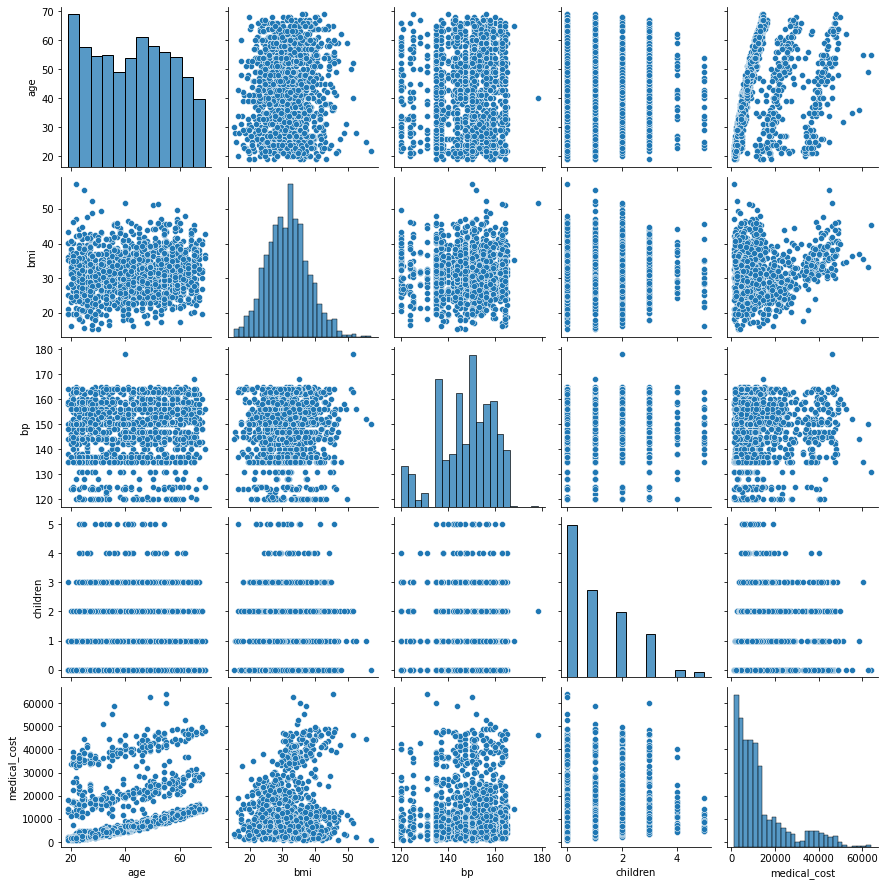

In [101]:
sns.pairplot(df)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='smoker', ylabel='medical_cost'>

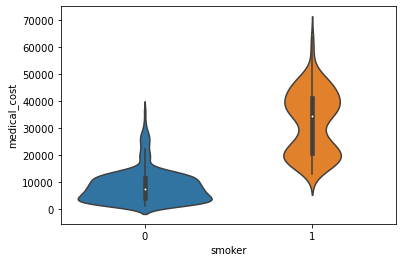

In [21]:
#df.groupby('smoker')['medical_cost'].mean()

sns.violinplot(x ='smoker',y ='medical_cost',data =df)

In [105]:
sns.scatterplot(df,x ='smoker',y='medical_cost')

ValueError: Could not interpret value `medical_cost` for parameter `y`

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='region', ylabel='age'>

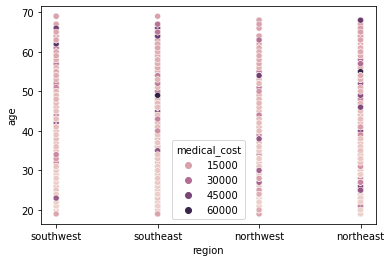

In [25]:
sns.scatterplot(x='region',y='age',data =df,hue='medical_cost')

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
#from sklearn.preprocessing import 
pd.get_dummies(df,columns=['region'])

,age,gender,bmi,bp,children,smoker,medical_cost,region_northeast,region_northwest,region_southeast,region_southwest
0,23,M,31.900,157,0,smoker,16884.92400,0,0,0,1
1,20,F,36.770,160,1,non-smoker,1725.55230,0,0,1,0
2,33,F,35.000,145,3,non-smoker,4449.46200,0,0,1,0
3,37,F,23.705,153,0,non-smoker,21984.47061,0,1,0,0
4,36,F,27.880,156,0,non-smoker,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1295,54,F,30.970,143,3,non-smoker,10600.54830,0,0,0,1
1296,22,M,34.920,156,0,non-smoker,2205.98080,1,0,0,0
1297,21,M,34.850,145,0,non-smoker,1629.83350,0,0,1,0
1298,22,M,24.800,150,0,non-smoker,2007.94500,0,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoker'] =le.fit_transform(df['smoker'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
df['gender_'] = df['gender'].map(df['gender'].value_counts(normalize = True))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df['smoker'] =le.fit_transform(df['smoker'])

<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
df['z_score_'] = (df['bmi']-df['bmi'].mean())/df['bmi'].std()

In [38]:
df['z_score_'].mean()

3.460842723512769e-15

In [39]:
df['z_score_'].var()

0.9999999999999964

<AxesSubplot:xlabel='bmi', ylabel='Count'>

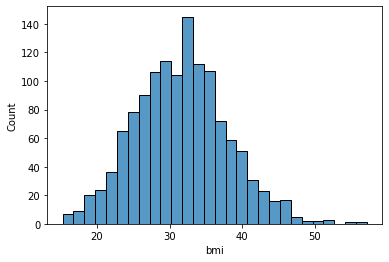

In [40]:
sns.histplot(df['bmi'])

<AxesSubplot:xlabel='z_score_', ylabel='Count'>

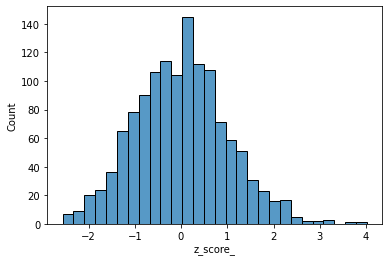

In [41]:
sns.histplot(df['z_score_'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [116]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
df['mm_sc'] = m.fit_transform(df[['age']])

<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
df['medical_cost'].skew()
df['medical_cost_'] = np.log(df['medical_cost'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [27]:
df['log_med'] = np.log(df['medical_cost'])

In [28]:
df['log_med_norm'] = np.exp(df['log_med'])

<AxesSubplot:xlabel='log_med_norm', ylabel='Density'>

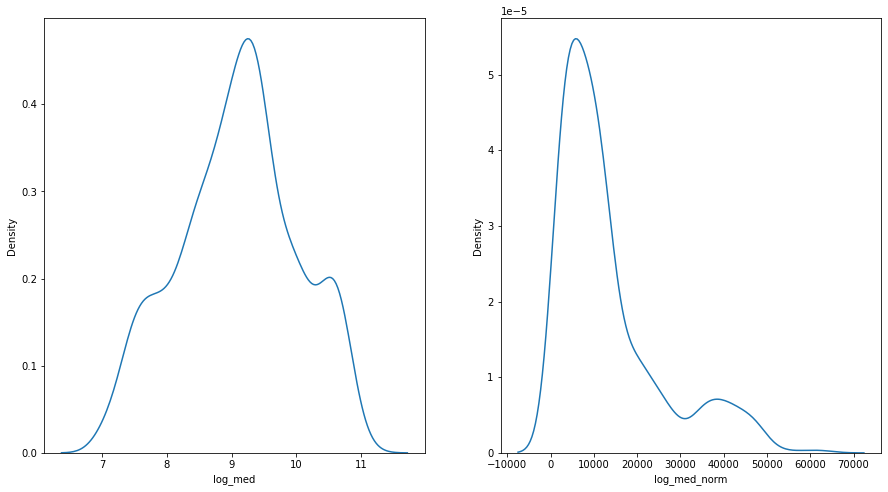

In [35]:
fig,axes=plt.subplots(1,2,figsize=(15,8))
sns.kdeplot(df['log_med'],ax=axes[0])
sns.kdeplot(df['log_med_norm'],ax=axes[1])